In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
train = pd.read_csv('train.csv')

In [124]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [125]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [128]:
train[['Pclass','Cabin']]

,Pclass,Cabin
0,3,NaN
1,1,C85
2,3,NaN
3,1,C123
4,3,NaN
...,...,...
886,2,NaN
887,1,B42
888,3,NaN
889,1,C148


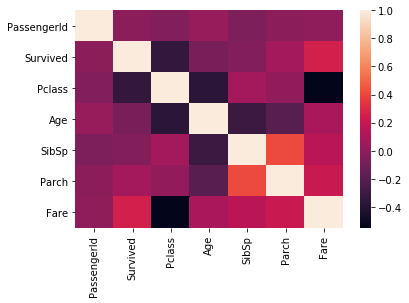

In [129]:
sns.heatmap(train.corr())

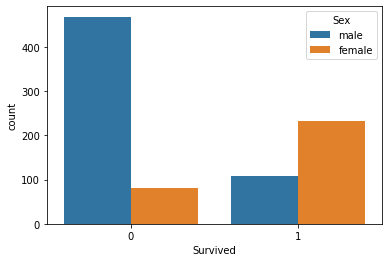

In [130]:
sns.countplot(data=train,x='Survived',hue='Sex')

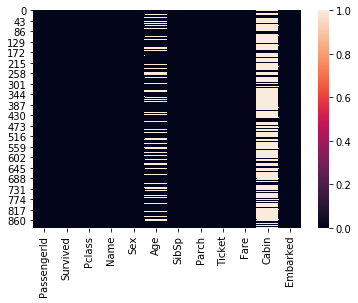

In [131]:
sns.heatmap(train.isnull())

# THERE A LOT OF MISSING DATA WHICH WE NEED TO TAKE CARE OF

In [133]:
train['Age'].count()
# Age column has 177 missing values
# We will check for some correlations for Age column

714

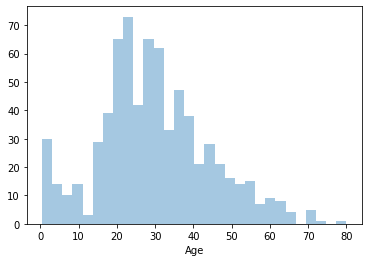

In [134]:
sns.distplot(train['Age'],bins =30,kde = False)

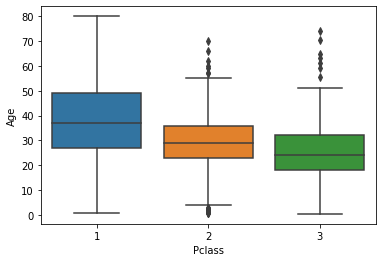

In [135]:
sns.boxplot(data=train,x = 'Pclass', y = 'Age')

In [136]:
train[train['Pclass'] == 3]['Age'].dropna().mean()

25.14061971830986

In [137]:
train[train['Pclass'] == 2]['Age'].dropna().mean()

29.87763005780347

In [138]:
train[train['Pclass'] == 1]['Age'].dropna().mean()

38.233440860215055

# This Boxplot shows that Pclass and Age are related

# We will define a function to replace the missing age with average According to the Pclass

In [140]:
def avg_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
        
    else:
        return Age

In [141]:
train['Age'] = train[['Age','Pclass']].apply(avg_age,axis =1)

In [142]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [143]:
# Now we can see that there is no null value in the Age column

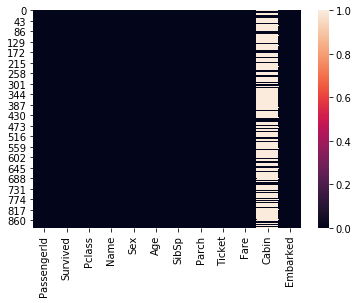

In [144]:
sns.heatmap(train.isnull())

In [145]:
#We can go ahead and drop the Cabin column as it has a lot of missing values 
# This will negatively affect our analysis 
train = train.drop('Cabin',axis =1)

In [146]:
train.isnull().sum()
#This shows the number of null values in each column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [147]:
# Now we need to make sure what column we need and what we don't for this analysis.
# We need to drop the Unnecessary columns before training the model.
train = train.drop(['Name','Ticket'],axis =1)

In [148]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# For training the model we need to create dummies for object columns
# In our case for Sex, Embarked 

In [150]:
S = pd.get_dummies(train['Sex'],drop_first=True)

In [151]:
E = pd.get_dummies(train['Embarked'],drop_first=True)

In [152]:
train = pd.concat([train,S,E],axis =1)

In [153]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.25,S,1,0,1


In [154]:
# NOW we go ahead and drop Age and Embarked 
train = train.drop(['Sex','Embarked'],axis = 1)

In [155]:
train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,1,0,1


In [156]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [157]:
# NOW we split data into X_train and y_train for our regression model

In [158]:
X_train = train.drop('Survived',axis = 1)
y_train = train['Survived']

# Now we will import test data and follow the steps as we did on train data

In [95]:
test = pd.read_csv('test.csv')

In [97]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [98]:
# We will go ahead and drop Name and Ticket up front
test = test.drop(['Name','Ticket'],axis = 1)

In [99]:
test = test.drop('Cabin',axis = 1)

In [100]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q


In [101]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# We can see that in this case there are missing values in Age column and One missing value in Fare
# For Age column we will use the Function we defined earlier 

In [103]:
test['Age'] = test[['Age','Pclass']].apply(avg_age,axis=1)

In [104]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.527512,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.851641,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Now we need to define function to cover values in Fare columns OR

# We can also just fill in the 1 null value

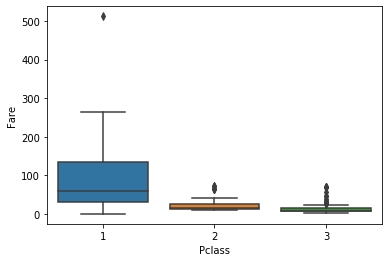

In [106]:
sns.boxplot(x = 'Pclass', y= 'Fare', data = test)

In [107]:
test[test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [108]:
test[test['Pclass'] == 2]['Fare'].mean()

22.20210430107527

In [109]:
test[test['Pclass'] == 1]['Fare'].mean()

94.28029719626169

In [81]:
def avg_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 1 :
            return 94
        elif Pclass == 2 :
            return 22
        else:
            return 13
        
    else:
        return Fare

In [160]:
test['Fare'] = test[['Fare','Pclass']].apply(avg_fare,axis=1)

In [161]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fair,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.527512,0.447368,0.392344,35.573056,35.573056,0.636364,0.110048,0.645933
std,120.810458,0.841838,12.851641,0.896760,0.981429,55.851467,55.851467,0.481622,0.313324,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,14.454200,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.471875,31.471875,1.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,512.329200,1.000000,1.000000,1.000000


In [162]:
test.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fair,male,Q,S
0,892,3,34.5,0,0,7.8292,7.8292,1,1,0


# We can clearly see that the count is 418 for every column so we have no null values
# No we have to create dummies for the non int columns
# In our case Sex and Embarked 

In [114]:
S1 = pd.get_dummies(test['Sex'],drop_first = True)

In [115]:
E1 = pd.get_dummies(test['Embarked'], drop_first=True)

In [116]:
test = pd.concat([test,S1,E1],axis = 1)

In [117]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fair,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,7.8292,1,1,0


In [91]:
# Now we are good to drop Age and Embarked 

In [118]:
test = test.drop(['Sex','Embarked'],axis = 1)

In [164]:
#accidentally added fair so we need to drop it
test = test.drop('Fair',axis =1)

In [165]:
test.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0


In [167]:
X_test = test

In [169]:
#WE don't need PassengerId column in both X_train and X_test
X_train = X_train.drop('PassengerId',axis = 1)
X_test = X_test.drop('PassengerId',axis = 1)

In [170]:
X_train.head(1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.25,1,0,1


In [171]:
X_test.head(1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0


# NOW WE ARE GOOD FOR BUILDING OUR MODEL

# First we will normalize the date

In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler = MinMaxScaler()

In [175]:
X_train = scaler.fit_transform(X_train)

In [176]:
X_test = scaler.transform(X_test) 
# We don't want to fit test data so we just transform it

# Building the MODEL

In [177]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
# Dense is used to add deep learning neuron layers 
# Dropout is used to drop randon layers while training to increase efficiency 

In [178]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation = 'relu'))
model.add(Dropout(0.3))

#this is the final and output layer So will have only one output neuron
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
# binary because we hava answer in 1 or 0 only

In [183]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  702       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  3081      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  760       
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  2

In [182]:
# Now we will fit our train values
model.fit(x= X_train, y = y_train, epochs= 25, verbose = 1)

Epoch 1/25
28/28 [==============================] - 0s 1ms/step - loss: 0.6577
Epoch 2/25
28/28 [==============================] - 0s 1ms/step - loss: 0.6106
Epoch 3/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5562
Epoch 4/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5279
Epoch 5/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4922
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4936
Epoch 7/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4942
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4925
Epoch 9/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4798
Epoch 10/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4565
Epoch 11/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4661
Epoch 12/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4559
Epoch 13/25
28/28 [==============================

In [184]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(418,)

In [195]:
pred = pred.reshape(418,)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [198]:
Result = pd.DataFrame(pred,test['PassengerId'],columns=['Survived'])

In [199]:
Result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [200]:
Result.to_csv('Titanic_Result')